In [88]:
import pickle
import joblib as jl
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator

In [2]:
    with open("../code/embedding/models/doc_data/all_docs.txt", "rb") as fp:
        all_docs = pickle.load(fp)
    with open("../code/embedding/models/doc_data/id_dict.txt", "rb") as fp:
        id_dict = pickle.load(fp)
    with open("../code/embedding/models/doc_data/all_docs_prepro.txt", "rb") as fp:
        all_docs_prepro = pickle.load(fp)
    with open("../code/embedding/models/doc_data/all_docs_sep.pkl", "rb") as fp:
        all_docs_sep = pickle.load(fp)

In [3]:
TFiDF = jl.load('../code/embedding/models/TF-IFD-ans.joblib')

In [4]:
faq_ans = all_docs_sep['faq_ans']
ticket_ans = all_docs_sep['ticket_ans']
faq_ques = all_docs_sep['faq_ques']
ticket_ques = all_docs_sep['ticket_ques']

In [5]:
FAQ_matrix = TFiDF.transform(faq_ans)
ticket_matrix = TFiDF.transform(ticket_ans)
print('Computing TF-IDF Similarities...')
sim_matrix = cosine_similarity(FAQ_matrix, ticket_matrix)
print('Done')

Computing TF-IDF Similarities...
Done


In [172]:
faq_ans[np.argmax(sim_matrix, 0)[13]]

'Password forgotten  Unfortunately we are not able to send your new password by email or by phone. You can pick up your new password at our desk at HG E 11 (main building) or we send it to your registred address. In case of sending the password by post please give us:your birthdateyour addressIf you want to pick up your passwort we have open from 9.30 to 11 am and from 1.30 to 4 pm. Take the student/ETH card with you.'

In [171]:
ticket_ans[13]

"Dear Mr. Dr. Marios Georgiadis\n\xa0\nYour account is not locked and the password wasn't changed since the end of\nApril.\n\nIhr ID-Team\nJoel Greuter\n\nDear Mr. Dr. Marios Georgiadis \n\nUnfortunately we are not able to send your new password by email or by phone.\nYou can pick up your new password at our desk at HG E 11 (main building) or we\nsend it to your registred address. In case of sending the password by post\nplease give us:\n\n - your birthdate \n - your address \n\nIf you want to pick up your passwort we have open from 9.30 to 11 am and from\n1.30 to 4 pm. Take the student/ETH card with you.\n\n Ihr ID-Team\nJoel Greuter\n\nDear Mr. Dr. Marios Georgiadis\n\xa0\nI will send it to the address in Zürich, c/o Mr.\xa0Casanova.\n\nIhr ID-Team\nJoel Greuter\n\nDear Mr. Marios Georgiadis\n\xa0\nI can't extend your account. For that you have to ask the IT of your\ndepartment.\n\nIhr ID-Team\nJoel Greuter\n\nDear Mr. Dr. Marios Georgiadis\n\xa0\nI reactivate your account for one we

In [177]:
cosine_similarity(TFiDF.transform([ticket_ans[15]]), TFiDF.transform([faq_ans[np.argmax(sim_matrix, 0)[15]]]))

array([[0.12615401]])

In [176]:
sim_matrix[np.argmax(sim_matrix, 0)[15], 15]

0.12615400535000829

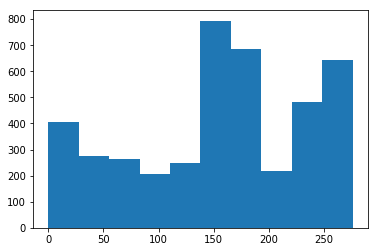

In [139]:
plt.hist(np.argmax(sim_matrix, 0))
plt.show()

In [6]:
sim_matrix.shape

(277, 4213)

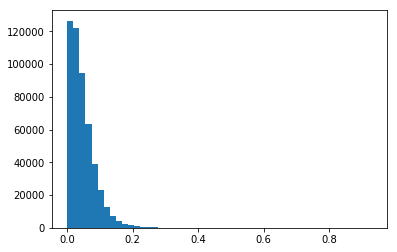

In [7]:
random_sample = np.random.choice(sim_matrix.flatten(), size=500000)
plt.hist(random_sample, bins = 50)
plt.show()

In [8]:
# Get the n'th biggest similarity value
depth = 1
n_biggest = pd.DataFrame(sim_matrix).apply(lambda row: row.nlargest(depth).values[-1],axis=0)

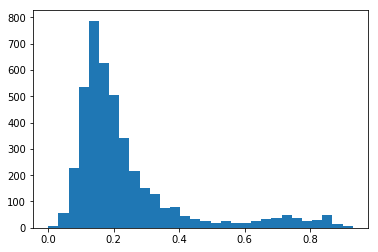

In [9]:
plt.hist(n_biggest, bins=30)
plt.show()

In [283]:
def word_importance(sentence):
    analyzer = TFiDF.build_analyzer()
    tokenized = analyzer(sentence)
    indexs = [TFiDF.vocabulary_[x] for x in tokenized]
    tfidf_vec = TFiDF.transform([sentence])[:, indexs].todense().tolist()[0]
    dict_of_words = dict(zip(tfidf_vec, tokenized))
    sorted_dict = sorted(dict_of_words.items(), key=operator.itemgetter(0), reverse=True)
    print(sorted_dict)

In [279]:
def ticket_faq_reason(ticket_id):
    # Should get the closest FAQ to the sentence, calculate element-wise product between ticket and faq tf-ids's and
    # then return the value per word to see which words were most important to the match.
    
    # ticket id is 0 - amount of tickers
    best_faq_index = np.argmax(sim_matrix, 0)[ticket_id]
    faq_ans_text = faq_ans[np.argmax(sim_matrix, 0)[ticket_id]]
    ticket_ans_text = ticket_ans[ticket_id]
    
    print(ticket_ans_text)
    print("-----")
    print(faq_ans_text)
    
    embeddings = TFiDF.transform([faq_ans_text, ticket_ans_text]).todense()
    entry_wise_product = np.multiply(embeddings[0], embeddings[1])
    
    reverse_dict = inv_map = {v: k for k, v in TFiDF.vocabulary_.items()}
    words = [reverse_dict[index] for index in np.argwhere(entry_wise_product)[:, 1]]
    
    dict_with_scores =  dict(zip(words, entry_wise_product[entry_wise_product>0].tolist()[0]))
    
    sorted_dict = sorted(dict_with_scores.items(), key=operator.itemgetter(1), reverse=True)
    
    return sorted_dict
    

In [284]:
test_id = 96
tix = faq_ans[test_id]
print(tix)
print('----')
word_importance(tix)

Where can I get ETH software?  ETH software can be ordered over the IDES system. The order can be placed onhttp://www.ides.ethz.ch/After ordering the software you will get an e-mail with further informations for the installation. Informations how to download the software can be found here:https://www1.ethz.ch/id/servicedesk/guide/ides/index
----
[(0.47012933732332657, 'ides'), (0.41126252045501177, 'software'), (0.2953859949788947, 'informations'), (0.21771059840246904, 'onhttp'), (0.19949729914534683, 'get'), (0.18032259119448793, 'can'), (0.1729590565375702, 'ordering'), (0.17095988497188266, 'placed'), (0.16258814843703545, 'be'), (0.16020051685619452, 'www1'), (0.15782002015732569, 'index'), (0.14489451432284675, 'the'), (0.13695022997411777, 'eth'), (0.13682035792760058, 'servicedesk'), (0.13318101440505523, 'ordered'), (0.12963512099696872, 'guide'), (0.12718793183906205, 'download'), (0.11442939215768634, 'installation'), (0.11038026134295727, 'over'), (0.10796393100395683, 'eth

In [301]:
test_id = 2300
ticket_faq_reason(test_id)

Dear Mr. Rico Camponovo Where do you try to log in? Your ID Team Joel GreuterDear Mr. Rico Camponovo Can you still log on to [1] www.passwort.ethz.ch? Your ID Team Joel GreuterDear Mr. Rico Camponovo Did you write the user name completely in small letters (ricoc)? Your ID Team Joel GreuterDear Mr. Rico Camponovo In this case you would need a new password. Unfortunately we are not allowed to give out the password by phone or e-mail. You can pick it up at our service desk (HG E 11) or we will send you the password home. In this case, please provide us with the following details: - Date of birth - Address If you would like to pick up the password from us, we are open from 9.30 am to 11 am and from 1.30 pm to 4 pm. Take your Legi resp. Your employee badge with. Your ID Team Joel GreuterDear Mr. Rico Camponovo As already written, we are in HG E 11. Your ID-Team Joel GreuterDear Mr. Rico Camponovo Your password is on the way. Please note that this password is only valid for the login on the 

[('password', 0.06757712904350739),
 ('11', 0.023476430770427645),
 ('pm', 0.02125827654869174),
 ('pick', 0.019953582517584403),
 ('to', 0.01686202637872265),
 ('from', 0.015281436186691486),
 ('am', 0.014415914391352196),
 ('30', 0.013843038687249185),
 ('we', 0.012297529153521147),
 ('the', 0.011835686279061569),
 ('up', 0.010861782190804702),
 ('you', 0.010611283690856675),
 ('us', 0.008629077147676393),
 ('hg', 0.00848567716979207),
 ('are', 0.008076023092492184),
 ('your', 0.007955739807044107),
 ('badge', 0.00677423329114935),
 ('case', 0.0067573444311232155),
 ('legi', 0.0065059066018599565),
 ('resp', 0.0065059066018599565),
 ('or', 0.005888633150781091),
 ('allowed', 0.005709500491389159),
 ('employee', 0.005374968900994639),
 ('provide', 0.00492319763876187),
 ('home', 0.004726396547522378),
 ('with', 0.004366092089187435),
 ('date', 0.004253645855724177),
 ('in', 0.004040255358907468),
 ('this', 0.003977402085671905),
 ('out', 0.003827445994770648),
 ('open', 0.003778440797